## Plotting Sigmoid Function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

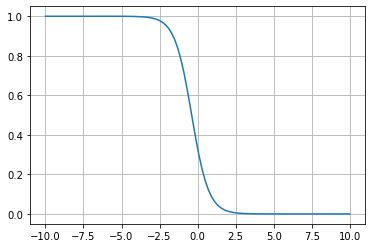

In [4]:
w=-1.8
b=-0.7
x = np.linspace(-10,10,100)
plt.plot(x,sigmoid(x,w,b))
plt.grid()
plt.show()


In [5]:
sigmoid_2d = lambda x1,x2,w1,w2,b : 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [6]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [7]:
from mpl_toolkits import mplot3d

In [9]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,80)

x1,x2 = np.meshgrid(x1,x2)
x1.shape , x2.shape

((80, 100), (80, 100))

In [10]:
w1 = 0.5
w2=0.5
b=0
Y = sigmoid_2d(x1,x2,w1,w2,b)

In [11]:
import matplotlib.colors

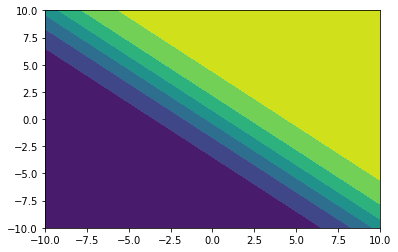

In [13]:
plt.contourf(x1,x2,Y)
plt.show()


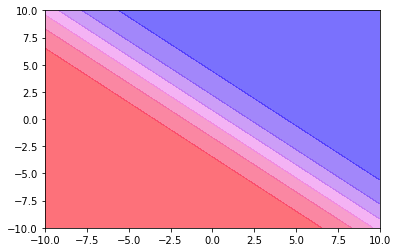

In [14]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "violet", "blue"])
plt.contourf(x1,x2,Y, cmap=my_cmap, alpha=0.6)
plt.show()

In [15]:
Y.shape

(80, 100)

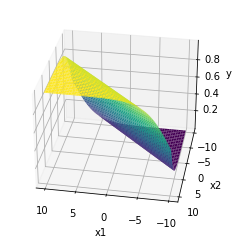

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 100)
plt.show()

In [18]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

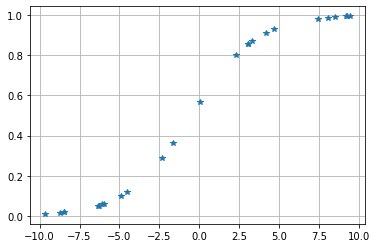

In [19]:
plt.plot(X, Y, '*')
plt.grid()
plt.show()

In [20]:
def calculate_loss(X,Y,w_est,b_est):
    loss=0
    for x,y in zip(X,Y):
        loss+=(y-sigmoid(x,w_est,b_est))**2
        return loss

In [22]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW,BB=np.meshgrid(W,B)
loss = np.zeros(WW.shape)

In [23]:
WW.shape,BB.shape,loss.shape

((100, 100), (100, 100), (100, 100))

In [24]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])

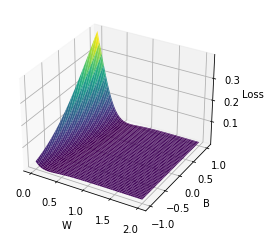

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')


plt.show()

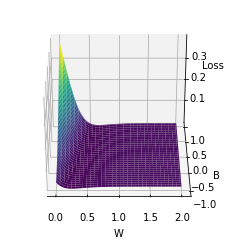

In [27]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B) 
loss = np.zeros(WW.shape)


for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30, 270)
plt.show()

In [31]:
ij = np.argmin(loss)

In [33]:
i = np.floor(ij/loss.shape[1])
j = ij - i * loss.shape[1]
i, j = int(i), int(j)

In [34]:
WW[i, j], BB[i, j]

(0.38, -0.33999999999999997)

In [35]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    """
    computes x1*w1 + x2*w2 . . . + b
    """
    def perceptron(self, x):
        return np.dot(x.reshape(1, -1), self.w.T) + self.b
    
    """
    computes 1 / (1 + e^-x)
    """
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        # compute the predicted value, 1 / (1 + e^perceptron(x))
        # perceptron(x) will give x1*w1+x2*w2 . . . +b
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        # compute the predicted value, 1 / (1 + e^perceptron(x))
        # perceptron(x) will give x1*w1+x2*w2 . . . +b
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * 1.0

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):

        # initialize w, b

        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        # run for epoch number of times
        for i in range(epochs):
            dw = 0
            db = 0
            # calculate delta_w and delta_b 
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)

            self.w -= learning_rate * dw
            self.b -= learning_rate * db

In [36]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    
    YY = np.zeros(XX1.shape)

    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=my_cmap)
    ax.plot()

In [37]:
X = np.array([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = np.array([1, 1, 1, 0, 0, 0])
X.shape, Y.shape

((6, 2), (6,))

[[0.07840113 0.98211678]] [[0.00021996]]
[[0.86459939 0.65953436]] [[0.01617565]]
[[0.98580264 0.26522433]] [[0.07399735]]
[[ 1.04529285 -0.37016688]] [[0.11092356]]
[[ 1.16076586 -0.36205171]] [[0.0043733]]
[[ 1.22241364 -0.45873146]] [[-0.08761449]]
[[ 1.3339141  -0.37602859]] [[-0.16138966]]
[[ 1.35043274 -0.5411634 ]] [[-0.23306945]]
[[ 1.4692588  -0.39615562]] [[-0.28829573]]
[[ 1.46713003 -0.57671599]] [[-0.34730996]]
[[ 1.56449713 -0.45612131]] [[-0.38974458]]
[[ 1.57412294 -0.56341864]] [[-0.43332995]]
[[ 1.63137104 -0.5207451 ]] [[-0.46624136]]
[[ 1.65686879 -0.55662529]] [[-0.4983958]]
[[ 1.69203678 -0.55726574]] [[-0.52643253]]
[[ 1.72077371 -0.56951028]] [[-0.5527474]]
[[ 1.74891794 -0.57778331]] [[-0.57700797]]
[[ 1.77520639 -0.58627538]] [[-0.59962806]]
[[ 1.80010779 -0.59420347]] [[-0.62076749]]
[[ 1.82372321 -0.60173559]] [[-0.64059683]]


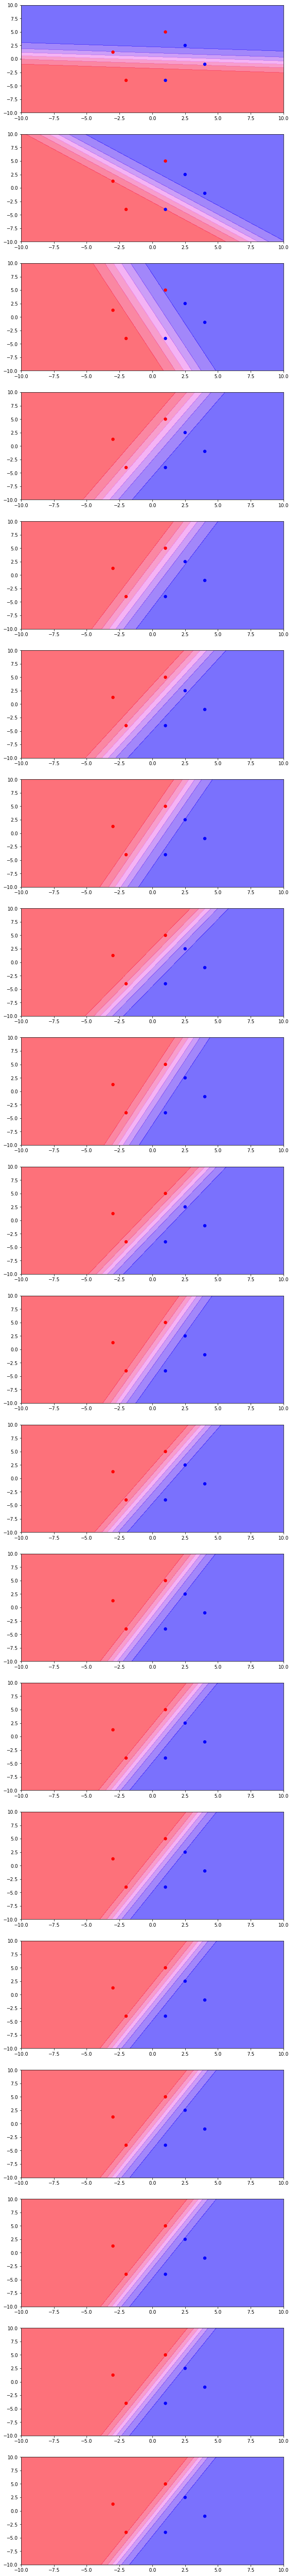

In [38]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.01, True)

N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.75, False)
plt.show()